In [1]:
import numpy as np
from regain.data.base import load_commodities_data,load_ETF_data
from regain.hmm.higher_order_hmm_graphical_lasso import HHMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt

In [2]:
# load data commodities

data = load_commodities_data(type_data = 1)
print(data)

     VIX Index  OVX Index  XAU Curncy  XAG Curncy  DXY Curncy        M2  \
0    -7.343825  -1.330604   -0.730649   -0.201163   -0.316442  5.282669   
1   -10.808029   3.181189   -1.089916    0.493755   -0.956573  5.809859   
2     5.770340   5.110590    0.700505    0.419075    0.412393 -6.455907   
3    -8.074195   0.653595   -0.356876   -0.618794   -0.443683  4.073284   
4     2.611276  -3.658537   -2.433548   -3.123081    1.206596  1.982567   
..         ...        ...         ...         ...         ...       ...   
984 -12.174721 -11.201473   -0.053146   -0.440868    0.163028  2.574526   
985   0.634921  -5.581476   -0.601276   -0.543333    0.303892 -0.264201   
986  -2.786540  -1.189605    0.508621    1.249496   -0.598753 -2.168874   
987   1.622499  -0.055566    0.244016   -0.102607   -0.008266  1.387714   
988  -3.831825   3.854707   -0.301419   -0.747635    0.510447 -0.751127   

     Trade_Date  
0    2015-01-02  
1    2015-01-05  
2    2015-01-06  
3    2015-01-07  
4    2015

In [3]:
Dates = data['Trade_Date'].values
Dataset = data.drop(columns=['Trade_Date'])
Returns = Dataset.values

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


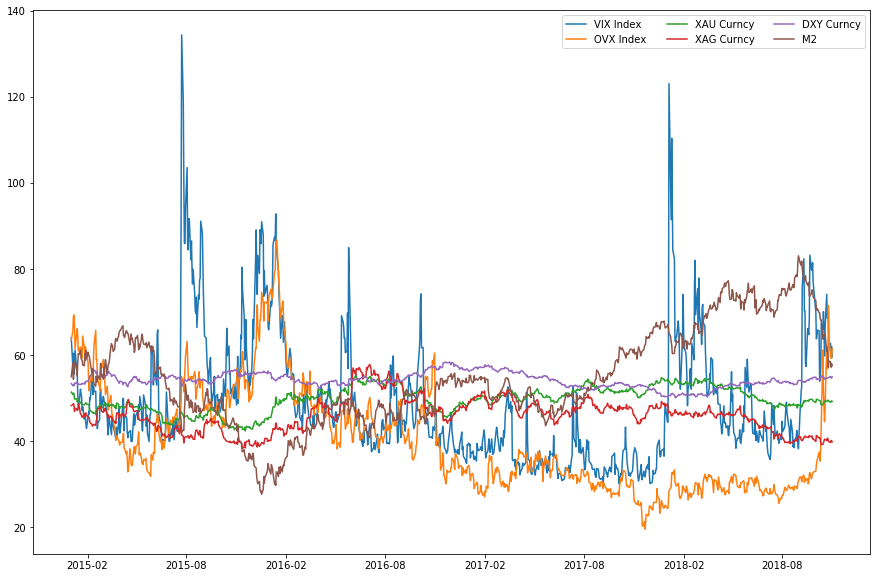

In [4]:
p_vec_0 = np.random.uniform(30,100,Returns.shape[1])
Data = np.zeros((np.size(Returns,axis=0)+1,Returns.shape[1]))
Data[0, :] = p_vec_0
for j in range(1, Returns.shape[0]+1):
    Data[j,:] =  Data[j-1,:] + Returns[j-1,:]*Data[j-1,:]/100
    
plt.figure(figsize= (15,10))
for i in range(Data.shape[1]):
    plt.plot(Dates, Data[1:, i], label = Dataset.columns[i])
plt.legend(ncol=3)
plt.show()

In [5]:
lam = 1
max_iter = 300
N_states = 2
mem = 3

mdl = HHMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=5,
                         n_jobs=-1,
                         N_memory_trans = mem,
                         N_memory_emis=1)
mdl.fit(Returns)

HHMM_GraphicalLasso(N_memory_emis=1, N_memory_trans=3, alpha=1, init_params={},
                    max_iter=300, mode='scaled', n_clusters=2, n_jobs=-1,
                    repetitions=5, tol=0.0001, verbose=False,
                    warm_restart=True)

0|0,0,0
0|0,0,1
0|0,1,0
0|0,1,1
1|1,0,0
1|1,0,1
1|1,1,0
1|1,1,1


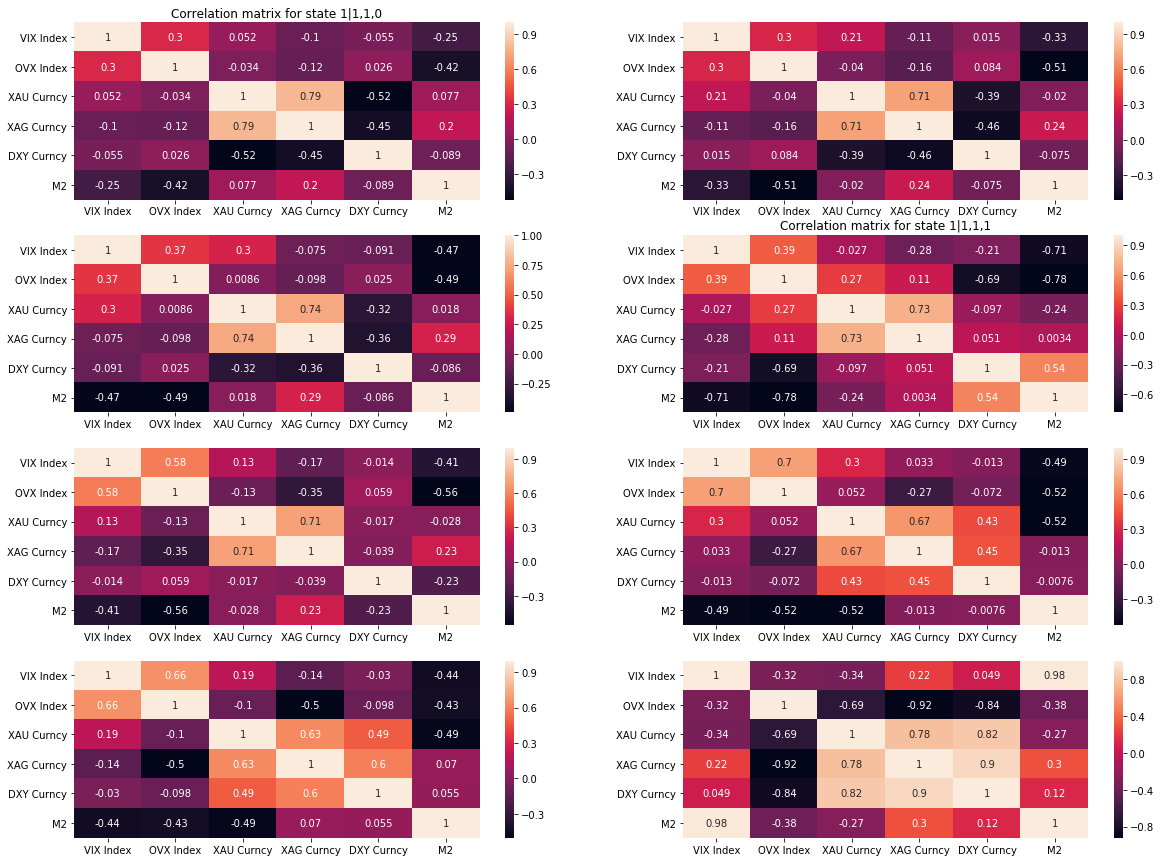

In [6]:
corr_plot(mdl.covariances_,
          labels = Dataset.columns,
          sizeploty=15,
          N_st = N_states,
          mem = mem,
          HHMM = True,
          covcorr = True)

In [7]:
mdl.lambdas

array([0.00106653, 0.01202919, 0.0231221 , 0.16269983, 0.01946411,
       0.0800576 , 0.10958604, 0.33568837])

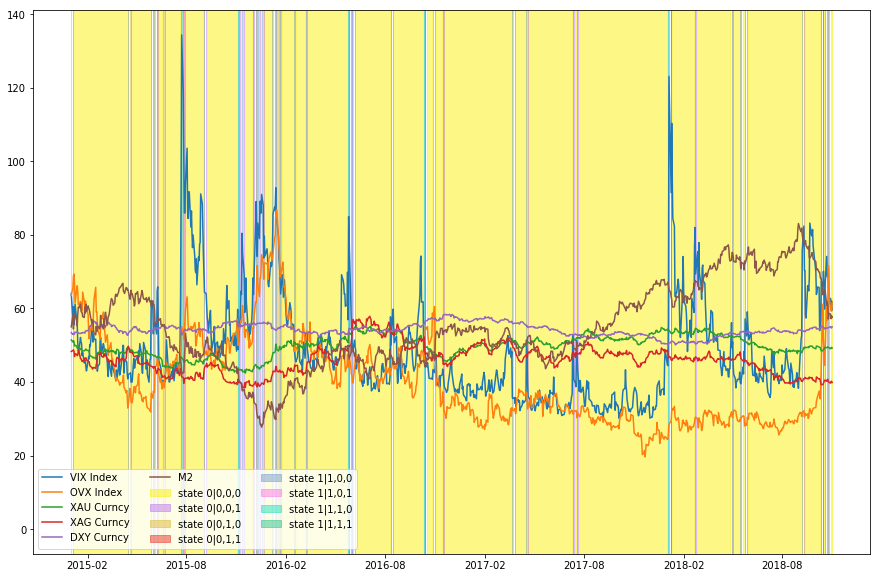

In [8]:
plot_results_cluster(Data,
                     mdl.labels_,
                     Dates =Dates,
                     N_st = N_states,
                     mem = mem,
                     HHMM = True,
                     ts_labels = Dataset.columns)

In [10]:
df = cluster_returns_recap(mdl.means_, mdl.covariances_, Dataset.columns,N_st = N_states,mem = mem,HHMM = True)

In [11]:
df.loc[df['TS'] == 'M2']

,Cluster,TS,mean,std,Prob positive return %,Prob negative return %
5,"0|0,0,0",M2,0.070613,2.187550,51.152551,48.577470
11,"0|0,0,1",M2,0.261821,3.913591,52.531959,47.198061
17,"0|0,1,0",M2,0.030213,3.946272,50.170438,49.559583
23,"0|0,1,1",M2,-2.729446,2.563492,14.214756,85.515264
29,"1|1,0,0",M2,-0.640043,2.094797,37.862777,61.867243
35,"1|1,0,1",M2,-1.333799,2.344788,28.338390,71.391631
41,"1|1,1,0",M2,-1.924719,2.288711,19.883471,79.846549
47,"1|1,1,1",M2,-4.116358,1.874912,1.271422,98.458599


In [2]:
# load data ETF

data = load_ETF_data()
print(data)

             VTI         SPY        EFA        VWO         TLT         IEF  \
0      55.983719  111.483650  53.489937  29.409512   58.628643   59.735962   
1      56.350910  111.979050  53.847092  29.783701   58.641998   59.793949   
2      56.538418  112.489952  54.025677  29.880840   58.460850   59.692425   
3      57.108776  113.558159  54.595730  30.255022   58.782974   59.757679   
4      57.198647  113.860085  54.602592  30.147093   59.111759   60.011406   
...          ...         ...        ...        ...         ...         ...   
3152  151.690002  298.399994  66.139999  41.380001  139.919998  111.889999   
3153  152.190002  299.279999  66.300003  41.509998  139.580002  111.849998   
3154  151.580002  297.970001  66.269997  41.400002  139.580002  111.949997   
3155  152.570007  299.989990  66.629997  41.700001  138.529999  111.540001   
3156  152.110001  299.010010  66.470001  41.669998  139.339996  111.800003   

         IAU        HYG         LQD         TIP        VNQ     

In [3]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data.values[i,:]-data.values[i-1,:])/data.values[i-1,:]*100

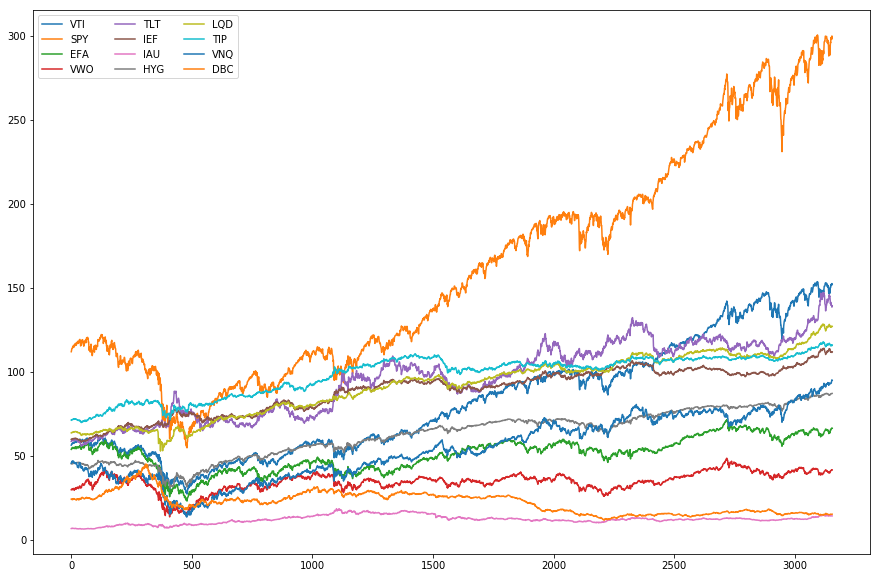

In [4]:
# Plot data

plt.figure(figsize= (15,10))
for i in range(data.shape[1]):
    plt.plot( data.values[1:, i], label = data.columns[i])
plt.legend(ncol=3)
plt.show()

In [5]:
lam = 1
max_iter = 300
N_states = 3

mdl = HHMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=5,
                         n_jobs=-1,
                         N_memory_trans = 2,
                         N_memory_emis=1,)
mdl.fit(returns_mat)

HHMM_GraphicalLasso(N_memory_emis=1, N_memory_trans=2, alpha=1, init_params={},
                    max_iter=300, mode='scaled', n_clusters=3, n_jobs=-1,
                    repetitions=5, tol=0.0001, verbose=False,
                    warm_restart=True)

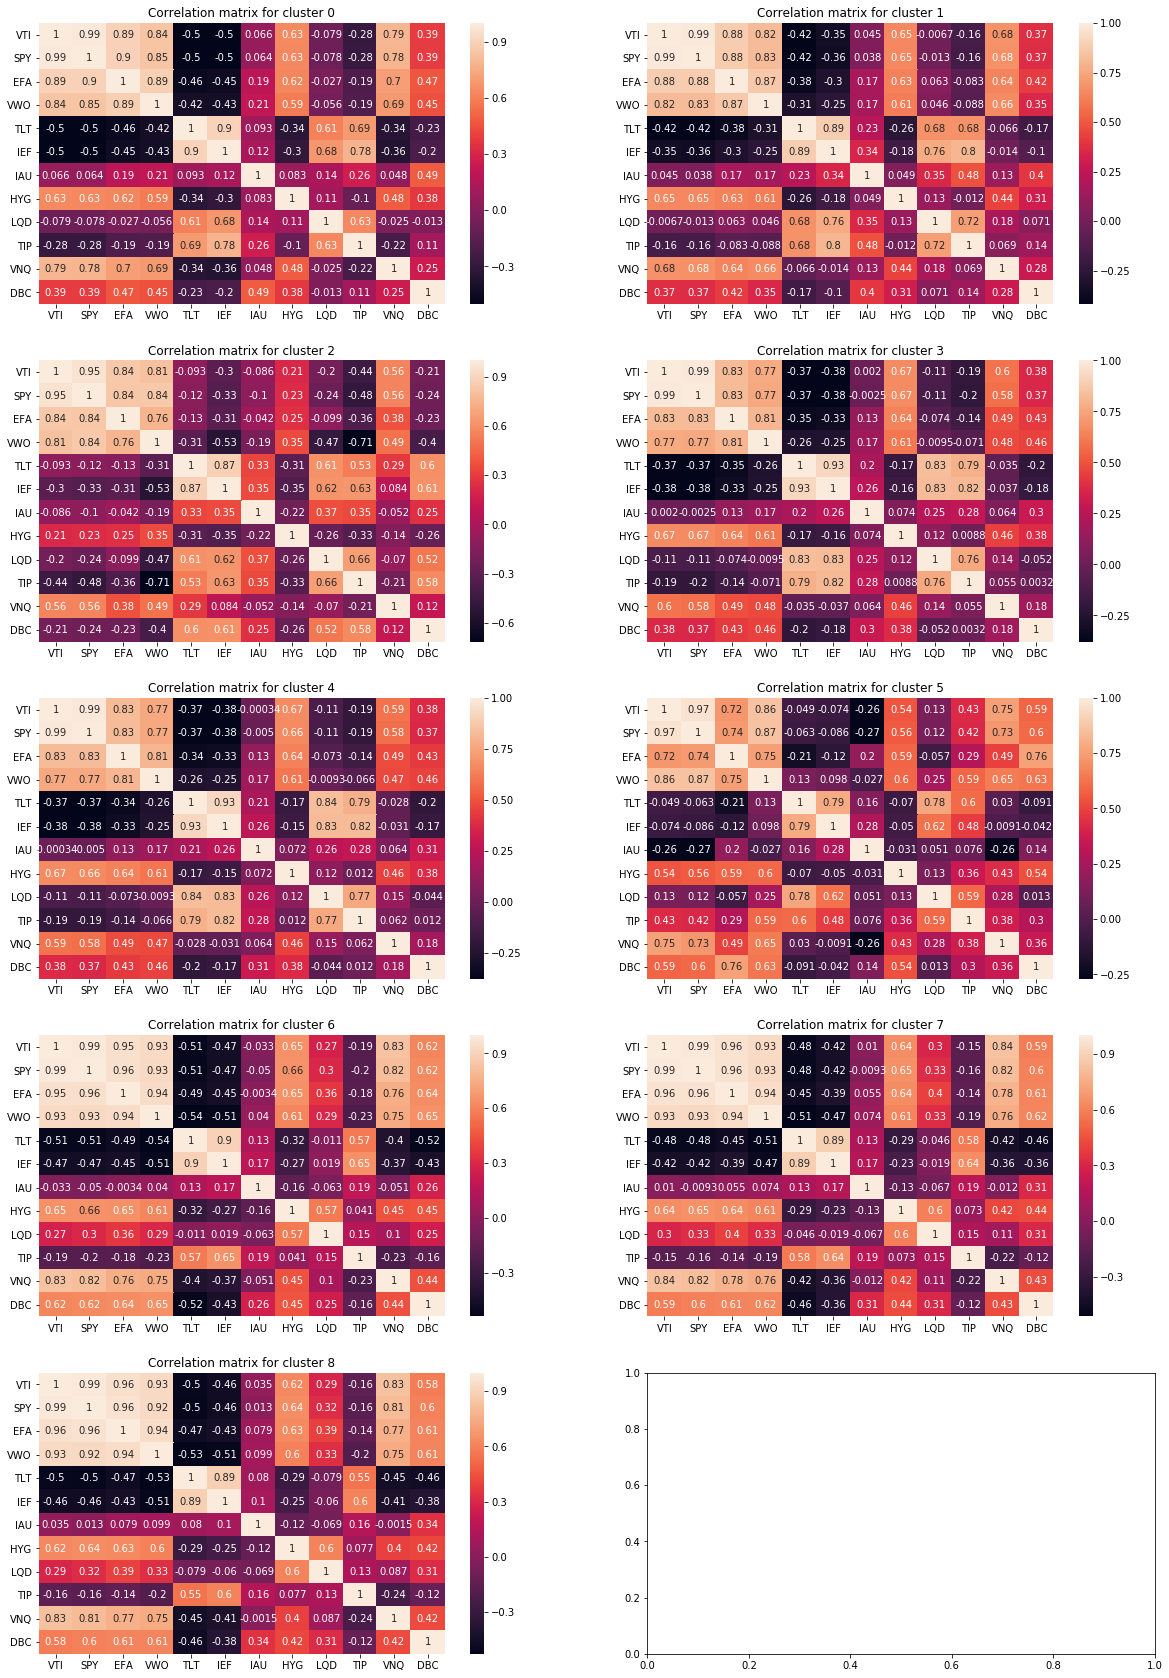

In [6]:
corr_plot(mdl.covariances_, labels = data.columns, sizeploty=30, covcorr = True)

None
None
None
None
None
None
None
None
None


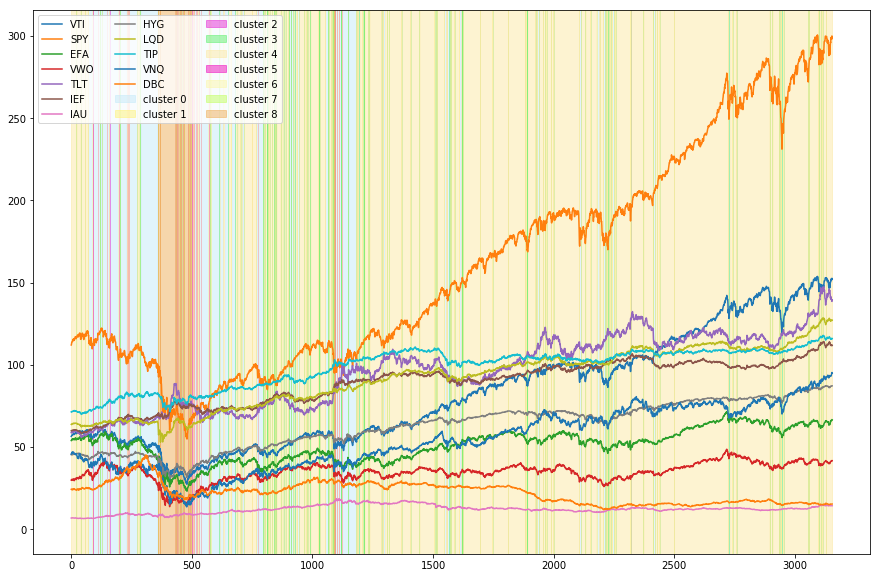

In [7]:
plot_results_cluster(data.values, mdl.labels_, ts_labels = data.columns)

In [8]:
cluster_returns_recap(mdl.means_, mdl.covariances_, data.columns)

,Cluster,TS,mean,std,Prob positive return %,Prob negative return %
0,0,VTI,-0.085606,1.431110,47.480054,52.249967
1,0,SPY,-0.086639,1.402905,47.402825,52.327196
2,0,EFA,-0.107992,1.638906,47.238163,52.491858
3,0,VWO,-0.079064,2.028236,48.310259,51.419761
4,0,TLT,0.049743,1.078481,51.704407,48.025613
...,...,...,...,...,...,...
103,8,HYG,-0.064004,2.827228,48.961941,50.768080
104,8,LQD,-0.040413,2.025305,49.069004,50.661017
105,8,TIP,-0.058708,1.053010,47.641944,52.088076
106,8,VNQ,-0.101218,7.436106,49.322001,50.408020


In [9]:
mdl.lambdas

array([0.00119023, 0.00541711, 0.03905626, 0.00046128, 0.00049459,
       0.04785737, 0.00675919, 0.00914546, 0.00985735])

In [1]:
for i in range(5):
    for j in range(5):
        if j>2:
            break
        print(i,j)
    

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
